In [3]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [4]:
# reading the Treebank tagged sentences
wsj = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [5]:
# first few tagged sentences
print(wsj[:40])

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], [('Rudolph', 'NOUN'), ('Agnew', 'NOUN'), (',', '.'), ('55', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), ('and', 'CONJ'), ('former', 'ADJ'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Consolidated', 'NOUN'), ('Gold', 'NOUN'), ('Fields', 'NOUN'), ('PLC', 'NOUN'), (',', '.'), ('was', 'VERB'), ('named', 'VERB'), ('*-1', 'X'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('British', 'ADJ'), ('industrial', 'ADJ'), ('

In [6]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(wsj,test_size=0.05)

print(len(train_set))
print(len(test_set))
print(train_set[:40])

3718
196
[[('Officials', 'NOUN'), ('of', 'ADP'), ('Triton', 'NOUN'), ('could', 'VERB'), ("n't", 'ADV'), ('be', 'VERB'), ('reached', 'VERB'), ('*-157', 'X'), ('for', 'ADP'), ('comment', 'NOUN'), ('.', '.')], [('But', 'CONJ'), ('several', 'ADJ'), ('teachers', 'NOUN'), ('also', 'ADV'), ('say', 'VERB'), ('0', 'X'), ('the', 'DET'), ('incident', 'NOUN'), ('casts', 'VERB'), ('doubt', 'NOUN'), ('on', 'ADP'), ('the', 'DET'), ('wisdom', 'NOUN'), ('of', 'ADP'), ('*', 'X'), ('evaluating', 'VERB'), ('teachers', 'NOUN'), ('or', 'CONJ'), ('schools', 'NOUN'), ('by', 'ADP'), ('*', 'X'), ('using', 'VERB'), ('standardized', 'ADJ'), ('test', 'NOUN'), ('scores', 'NOUN'), ('.', '.')], [('The', 'DET'), ('issue', 'NOUN'), ('could', 'VERB'), ('be', 'VERB'), ('relaunched', 'VERB'), ('*-1', 'X'), (',', '.'), ('possibly', 'ADV'), ('in', 'ADP'), ('a', 'DET'), ('restructured', 'VERB'), ('form', 'NOUN'), (',', '.'), ('as', 'ADV'), ('early', 'ADV'), ('as', 'ADP'), ('next', 'ADJ'), ('week', 'NOUN'), (',', '.'), ('acco

In [7]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

95841

In [8]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['Officials',
 'of',
 'Triton',
 'could',
 "n't",
 'be',
 'reached',
 '*-157',
 'for',
 'comment']

In [9]:
# vocabulary
V = set(tokens)
print(len(V))

12101


In [10]:
# number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

12

In [11]:
print(T)

{'ADV', 'CONJ', 'VERB', 'PRON', 'DET', 'NUM', 'ADP', 'ADJ', 'NOUN', 'X', '.', 'PRT'}


In [12]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [13]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [14]:
# examples

# large
print("\n", "large")
print(word_given_tag('large', 'ADJ'))
print(word_given_tag('large', 'VERB'))
print(word_given_tag('large', 'NOUN'), "\n")

# will
print("\n", "will")
print(word_given_tag('will', 'MD'))
print(word_given_tag('will', 'NOUN'))
print(word_given_tag('will', 'VERB'))

# book
print("\n", "book")
print(word_given_tag('book', 'NOUN'))
print(word_given_tag('book', 'VERB'))


 large
(28, 6136)
(0, 12951)
(0, 27446)

 


 will
(0, 0)
(1, 27446)
(264, 12951)

 book
(6, 27446)
(1, 12951)


In [15]:
word_given_tag('Twitter','NOUN')

(0, 27446)

In [16]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [17]:
# examples
print(t2_given_t1(t2='NOUN', t1='ADJ'))
print(t2_given_t1('ADJ', 'NOUN'))
print(t2_given_t1('NOUN', 'DET'))
print(t2_given_t1('NOUN', 'VERB'))
print(t2_given_t1(',', 'NOUN'))
print(t2_given_t1('PRT', 'PRT'))
print(t2_given_t1('VERB', 'NOUN'))

(4293, 6136)
(328, 27446)
(5297, 8324)
(1424, 12951)
(0, 27446)
(6, 3072)
(4055, 27446)


In [18]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DET', '.'))
print(t2_given_t1('VERB', '.'))
print(t2_given_t1('NOUN', '.'))
print(t2_given_t1('NOUN', '.'))

(1930, 11116)
(986, 11116)
(2452, 11116)
(2452, 11116)


In [19]:
t2_given_t1('VERB','DET')

(331, 8324)

In [20]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [21]:
tags_matrix

array([[7.97749087e-02, 6.95134047e-03, 3.46573979e-01, 1.52267460e-02,
        6.88513741e-02, 3.07845082e-02, 1.17841773e-01, 1.30751401e-01,
        3.14465426e-02, 2.21780874e-02, 1.35385633e-01, 1.42336972e-02],
       [5.59408218e-02, 4.62320837e-04, 1.56264454e-01, 6.01017103e-02,
        1.17891818e-01, 4.16088775e-02, 5.22422567e-02, 1.17429495e-01,
        3.52750808e-01, 7.85945449e-03, 3.32871005e-02, 4.16088756e-03],
       [8.20786059e-02, 5.40498784e-03, 1.69330552e-01, 3.46691385e-02,
        1.34198129e-01, 2.23920941e-02, 9.11898687e-02, 6.61724955e-02,
        1.09952897e-01, 2.17666596e-01, 3.52868512e-02, 3.16577889e-02],
       [3.45496908e-02, 5.04658371e-03, 4.88354027e-01, 7.76397530e-03,
        9.31677036e-03, 7.76397530e-03, 2.36801244e-02, 7.14285746e-02,
        2.07686335e-01, 9.23913047e-02, 4.03726697e-02, 1.16459625e-02],
       [1.26141282e-02, 4.80538205e-04, 3.97645347e-02, 3.36376741e-03,
        5.76645834e-03, 2.22248919e-02, 9.37049463e-03, 2.06

In [22]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
tags_df

,ADV,CONJ,VERB,PRON,DET,NUM,ADP,ADJ,NOUN,X,.,PRT
ADV,0.079775,0.006951,0.346574,0.015227,0.068851,0.030785,0.117842,0.130751,0.031447,0.022178,0.135386,0.014234
CONJ,0.055941,0.000462,0.156264,0.060102,0.117892,0.041609,0.052242,0.117429,0.352751,0.007859,0.033287,0.004161
VERB,0.082079,0.005405,0.169331,0.034669,0.134198,0.022392,0.091190,0.066172,0.109953,0.217667,0.035287,0.031658
PRON,0.034550,0.005047,0.488354,0.007764,0.009317,0.007764,0.023680,0.071429,0.207686,0.092391,0.040373,0.011646
DET,0.012614,0.000481,0.039765,0.003364,0.005766,0.022225,0.009370,0.206271,0.636353,0.045651,0.018020,0.000120
NUM,0.002986,0.013735,0.018214,0.001493,0.003583,0.186324,0.034936,0.034040,0.353240,0.207823,0.116154,0.027471
ADP,0.013305,0.000745,0.008622,0.068654,0.325279,0.062054,0.016817,0.107717,0.320277,0.035444,0.039702,0.001384
ADJ,0.004889,0.017112,0.011897,0.000652,0.004889,0.020698,0.076597,0.066656,0.699641,0.021023,0.065189,0.010756
NOUN,0.016651,0.042994,0.147745,0.004482,0.013408,0.009327,0.177330,0.011951,0.264046,0.028930,0.239088,0.044050
X,0.025588,0.010013,0.205181,0.054355,0.054514,0.002861,0.144310,0.017006,0.062460,0.075493,0.162587,0.185633


In [23]:
tags_df.loc['.', :]

ADV     0.052897
CONJ    0.058204
VERB    0.088701
PRON    0.065761
DET     0.173624
NUM     0.080065
ADP     0.092030
ADJ     0.044620
NOUN    0.220583
X       0.027258
.       0.093919
PRT     0.002249
Name: ., dtype: float32

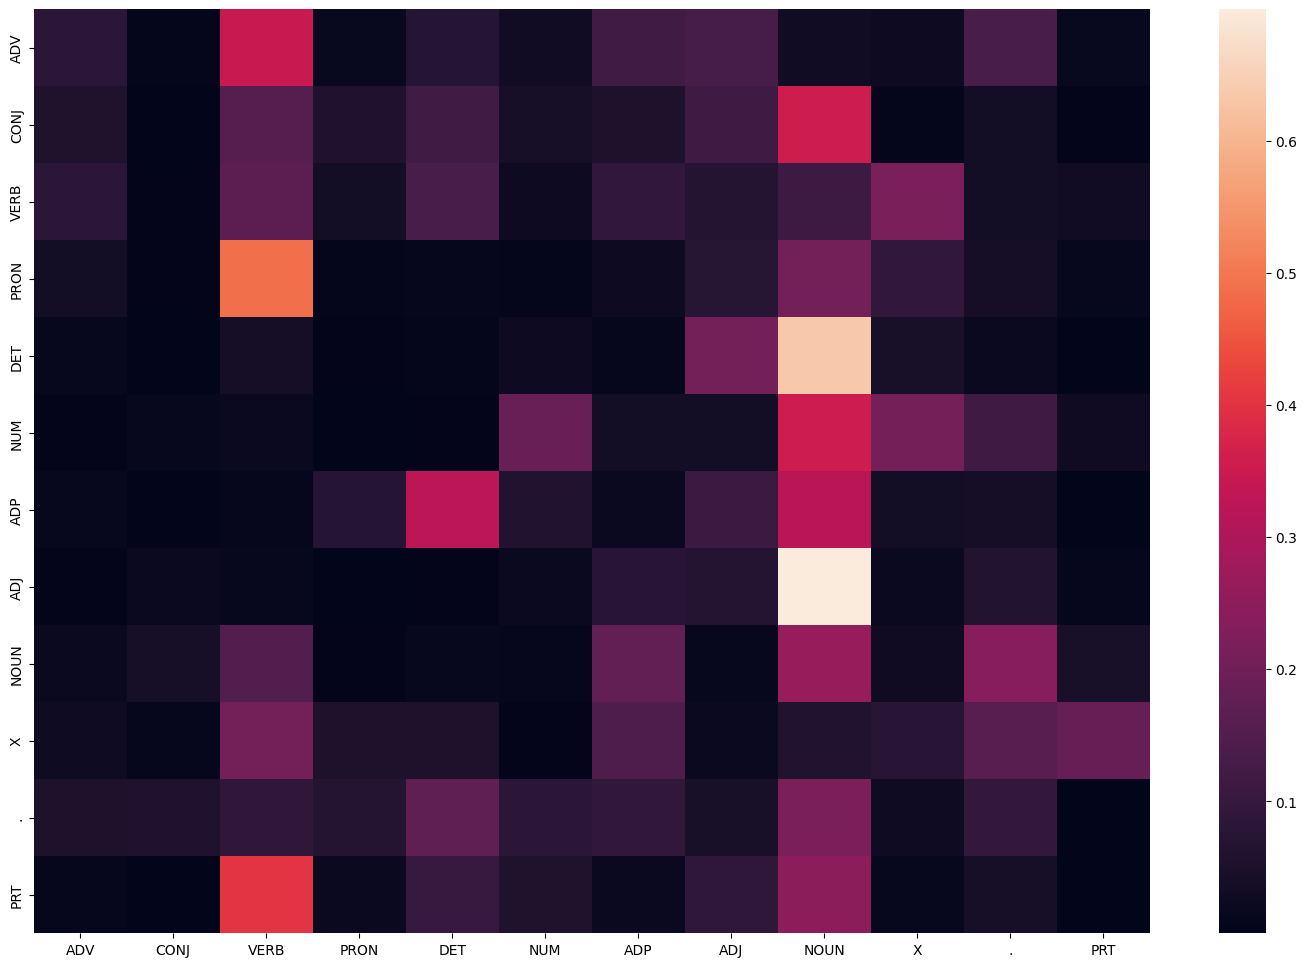

In [24]:
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

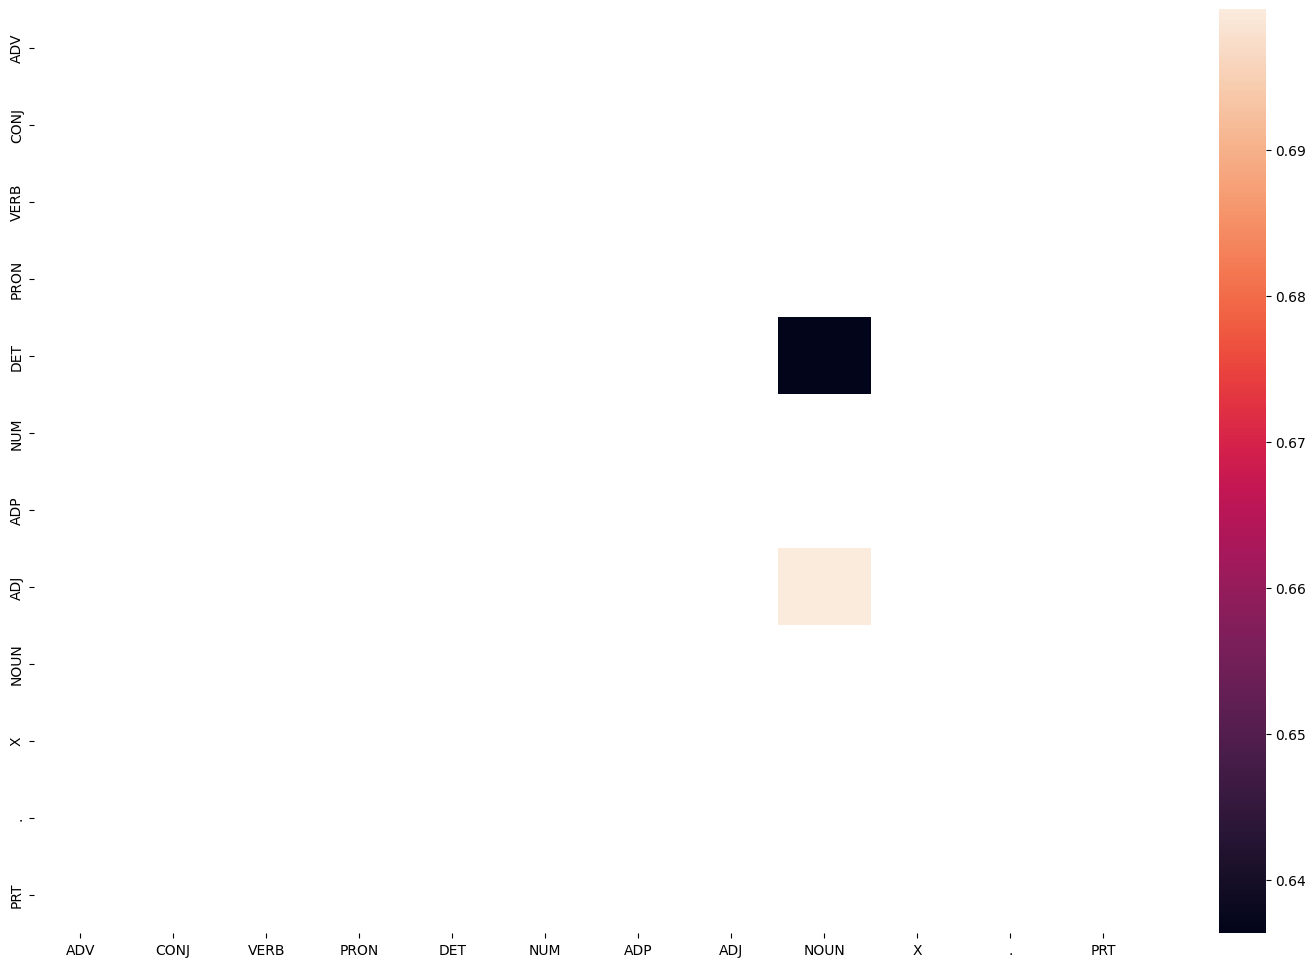

In [25]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

In [26]:
# Viterbi Heuristic
def Viterbi_vanilla(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))


In [27]:
def Viterbi_smoothed(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = 0.000001+word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]+0.000001*len(T)
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [28]:
def find_state(word):
    #punc=['"',"'",',','.','(',')','?','[',']',':',';']
    xc=['*']
    if re.search(r'.*(ing|ed|es|ould)$',word.lower()):
        return 'VERB'
    elif re.search(r'to$',str(word).lower()):
        return 'PRT'
    elif re.search(r'^-?[0-9]+(.[0-9]+)?\.*$',str(word).lower()):
        return 'NUM'
    elif '*' in word:
        return 'X'
    elif re.search(r'.*\'s$',word.lower()):
        return 'NOUN'
    elif re.search(r'.*ness$',word.lower()):
        return 'NOUN'
    elif re.search(r'(The|the|A|a|An|an)$',word):
        return 'ADP'
    elif re.search(r'.*able$',word.lower()):
        return 'ADJ'
    elif re.search(r'.*ly$',word.lower()):
        return 'ADV'
    elif re.search(r'(He|he|She|she|It|it|I|me|Me|You|you|His|his|Her|her|Its|its|my|Your|your|Yours|yours)$',word):
        return 'PRON'
    elif re.search(r'(on|On|at|At|since|Since|For|for|Ago|ago|before|Before|till|Till|until|Until|by|By|Beside|beside|under|Under|below|Below|over|Over|above|Above|across|Across|Through|through|Into|into|towards|Towards|onto|Onto|from|From)$',word):
        return 'ADP'
    elif re.search(r'',word):
        return 'NOUN'
    elif re.search(r'(\'|\"|\.|\(|\)|\?|\[|\]|\:|\;)+',word):
        return '.'
    else:        
        return 'NOUN'
    

    
def Viterbi_manual(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        if pmax==0.0:
            state_word=find_state(word)
            state.append(state_word)
            #print(word,':',state_word)
        else:
        # getting state for which probability is maximum
            state_max = T[p.index(pmax)] 
            state.append(state_max)
    return list(zip(words, state))

In [29]:
def Viterbi_common(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            if word in tokens: 
                emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            else:
                emission_p=1
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        if pmax==0.0:
            state_word='NOUN'
            state.append(state_word)
            #print(word,':',state_word)
        else:
        # getting state for which probability is maximum
            state_max = T[p.index(pmax)] 
            state.append(state_max)
    return list(zip(words, state))


In [30]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            if word in tokens: 
                emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            else:
                emission_p=1
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        #print('word is {} and list is {}'.format(word,p))
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [31]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

#random.seed(1234)

# choose random 5 sents
#rndom = [random.randint(1,len(test_set)) for x in range(10)]

# list of sents
#test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_set for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_set for tup in sent]
test_run_base

[('He', 'PRON'),
 ('succeeds', 'VERB'),
 ('James', 'NOUN'),
 ('A.', 'NOUN'),
 ('Taylor', 'NOUN'),
 (',', '.'),
 ('who', 'PRON'),
 ('*T*-1', 'X'),
 ('stepped', 'VERB'),
 ('down', 'PRT'),
 ('as', 'ADP'),
 ('chairman', 'NOUN'),
 (',', '.'),
 ('president', 'NOUN'),
 ('and', 'CONJ'),
 ('chief', 'NOUN'),
 ('executive', 'NOUN'),
 ('in', 'ADP'),
 ('March', 'NOUN'),
 ('for', 'ADP'),
 ('health', 'NOUN'),
 ('reasons', 'NOUN'),
 ('.', '.'),
 ('Leighton', 'NOUN'),
 ('E.', 'NOUN'),
 ('Cluff', 'NOUN'),
 ('M.D.', 'NOUN'),
 ('President', 'NOUN'),
 ('Robert', 'NOUN'),
 ('Wood', 'NOUN'),
 ('Johnson', 'NOUN'),
 ('Foundation', 'NOUN'),
 ('Princeton', 'NOUN'),
 (',', '.'),
 ('N.J', 'NOUN'),
 ('.', '.'),
 ('Last', 'ADJ'),
 ('year', 'NOUN'),
 ('Commonwealth', 'NOUN'),
 ('Edison', 'NOUN'),
 ('had', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('refund', 'VERB'),
 ('$', '.'),
 ('72.7', 'NUM'),
 ('million', 'NUM'),
 ('*U*', 'X'),
 ('for', 'ADP'),
 ('poor', 'ADJ'),
 ('performance', 'NOUN'),
 ('of', 'ADP'),
 ('its', '

In [32]:
# tagging the test sentences
start = time.time()
tagged_seq_vanilla = Viterbi_vanilla(test_tagged_words)
check = [i for i, j in zip(tagged_seq_vanilla, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq_vanilla)
end = time.time()
print('Time Taken:',end-start)
print('Accuracy is :',accuracy)

Time Taken: 409.1668198108673
Accuracy is : 0.9077559462254395


In [33]:
print('Vanilla Viterbi-Incorrect tagged cases are:')
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_vanilla, test_run_base)) if j[0]!=j[1]]
[i[1]for i in incorrect_tagged_cases]

Vanilla Viterbi-Incorrect tagged cases are:


[(('down', 'ADV'), ('down', 'PRT')),
 (('Leighton', 'ADV'), ('Leighton', 'NOUN')),
 (('Cluff', 'ADV'), ('Cluff', 'NOUN')),
 (('72.7', 'ADV'), ('72.7', 'NUM')),
 (('LaSalle', 'ADV'), ('LaSalle', 'NOUN')),
 (('I', 'PRON'), ('I', 'NOUN')),
 (('FOREIGN', 'ADV'), ('FOREIGN', 'NOUN')),
 (('13.50', 'ADV'), ('13.50', 'NUM')),
 (('4.875', 'ADV'), ('4.875', 'NUM')),
 (('combines', 'VERB'), ('combines', 'NOUN')),
 (('start', 'VERB'), ('start', 'NOUN')),
 (('feudal', 'ADV'), ('feudal', 'ADJ')),
 (('deal', 'NOUN'), ('deal', 'VERB')),
 (('manufacturing', 'NOUN'), ('manufacturing', 'VERB')),
 (('postponed', 'ADV'), ('postponed', 'VERB')),
 (('*-105', 'ADV'), ('*-105', 'X')),
 (('110', 'ADV'), ('110', 'NUM')),
 (('282', 'ADV'), ('282', 'NUM')),
 (('newsstands', 'ADV'), ('newsstands', 'NOUN')),
 (('93,000', 'ADV'), ('93,000', 'NUM')),
 (('default', 'NOUN'), ('default', 'VERB')),
 (('Trace', 'ADV'), ('Trace', 'NOUN')),
 (('unaffiliated', 'ADV'), ('unaffiliated', 'ADJ')),
 (('3.625', 'ADV'), ('3.625', 'N

In [34]:
# tagging the test sentences
start = time.time()
tagged_seq_smooth = Viterbi_smoothed(test_tagged_words)
check = [i for i, j in zip(tagged_seq_smooth, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq_smooth)
end = time.time()
print('Time Taken:',end-start)
print('Accuracy is :',accuracy)

Time Taken: 386.88697385787964
Accuracy is : 0.9367114788004136


In [35]:
print('Laplace smoothed Viterbi-Incorrect tagged cases are:')
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_smooth, test_run_base)) if j[0]!=j[1]]
[i[1]for i in incorrect_tagged_cases]

Laplace smoothed Viterbi-Incorrect tagged cases are:


[(('down', 'ADV'), ('down', 'PRT')),
 (('72.7', 'NOUN'), ('72.7', 'NUM')),
 (('LaSalle', 'VERB'), ('LaSalle', 'NOUN')),
 (('I', 'PRON'), ('I', 'NOUN')),
 (('13.50', 'NOUN'), ('13.50', 'NUM')),
 (('4.875', 'NOUN'), ('4.875', 'NUM')),
 (('vertically', 'NOUN'), ('vertically', 'ADV')),
 (('combines', 'VERB'), ('combines', 'NOUN')),
 (('start', 'VERB'), ('start', 'NOUN')),
 (('feudal', 'VERB'), ('feudal', 'ADJ')),
 (('deal', 'NOUN'), ('deal', 'VERB')),
 (('globally', 'NOUN'), ('globally', 'ADV')),
 (('manufacturing', 'NOUN'), ('manufacturing', 'VERB')),
 (('postponed', 'X'), ('postponed', 'VERB')),
 (('*-105', 'VERB'), ('*-105', 'X')),
 (('110', 'NOUN'), ('110', 'NUM')),
 (('282', 'NOUN'), ('282', 'NUM')),
 (('newsstands', 'DET'), ('newsstands', 'NOUN')),
 (('93,000', 'DET'), ('93,000', 'NUM')),
 (('default', 'NOUN'), ('default', 'VERB')),
 (('unaffiliated', 'NOUN'), ('unaffiliated', 'ADJ')),
 (('3.625', 'NOUN'), ('3.625', 'NUM')),
 (('robustly', 'VERB'), ('robustly', 'ADV')),
 (('financial

In [36]:
start = time.time()
tagged_seq_sm = Viterbi_manual(test_tagged_words)
check = [i for i, j in zip(tagged_seq_sm, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq_sm)
end = time.time()
print('Time Taken:',end-start)
print('Accuracy is :',accuracy)

Time Taken: 388.22757840156555
Accuracy is : 0.9511892450879007


In [37]:
print('Laplace smoothed Viterbi-Incorrect tagged cases are:')
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_sm, test_run_base)) if j[0]!=j[1]]
[i[1]for i in incorrect_tagged_cases]

Laplace smoothed Viterbi-Incorrect tagged cases are:


[(('down', 'ADV'), ('down', 'PRT')),
 (('Leighton', 'ADP'), ('Leighton', 'NOUN')),
 (('I', 'PRON'), ('I', 'NOUN')),
 (('combines', 'VERB'), ('combines', 'NOUN')),
 (('start', 'VERB'), ('start', 'NOUN')),
 (('feudal', 'NOUN'), ('feudal', 'ADJ')),
 (('deal', 'NOUN'), ('deal', 'VERB')),
 (('manufacturing', 'NOUN'), ('manufacturing', 'VERB')),
 (('default', 'NOUN'), ('default', 'VERB')),
 (('unaffiliated', 'VERB'), ('unaffiliated', 'ADJ')),
 (('Income', 'PRON'), ('Income', 'NOUN')),
 (('financial-services', 'ADJ'), ('financial-services', 'NOUN')),
 (('holding', 'NOUN'), ('holding', 'VERB')),
 (('CERTIFICATES', 'VERB'), ('CERTIFICATES', 'NOUN')),
 (('American', 'ADJ'), ('American', 'NOUN')),
 (('Delegates', 'VERB'), ('Delegates', 'NOUN')),
 (('reporting', 'VERB'), ('reporting', 'NOUN')),
 (('direct', 'ADJ'), ('direct', 'VERB')),
 (('Manfred', 'VERB'), ('Manfred', 'NOUN')),
 (('one', 'NUM'), ('one', 'PRON')),
 (('speaks', 'NOUN'), ('speaks', 'VERB')),
 (('downgrading', 'VERB'), ('downgrading

In [38]:
start = time.time()
tagged_seq_co = Viterbi_common(test_tagged_words)
check = [i for i, j in zip(tagged_seq_co, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq_co)
end = time.time()
print('Time Taken:',end-start)
print('Accuracy is :',accuracy)

Time Taken: 357.6284053325653
Accuracy is : 0.9369183040330921


In [39]:
print('Laplace smoothed Viterbi-Incorrect tagged cases are:')
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_co, test_run_base)) if j[0]!=j[1]]
[i[1]for i in incorrect_tagged_cases]

Laplace smoothed Viterbi-Incorrect tagged cases are:


[(('down', 'ADV'), ('down', 'PRT')),
 (('72.7', 'NOUN'), ('72.7', 'NUM')),
 (('LaSalle', 'VERB'), ('LaSalle', 'NOUN')),
 (('I', 'PRON'), ('I', 'NOUN')),
 (('13.50', 'NOUN'), ('13.50', 'NUM')),
 (('4.875', 'NOUN'), ('4.875', 'NUM')),
 (('vertically', 'NOUN'), ('vertically', 'ADV')),
 (('combines', 'VERB'), ('combines', 'NOUN')),
 (('start', 'VERB'), ('start', 'NOUN')),
 (('feudal', 'VERB'), ('feudal', 'ADJ')),
 (('deal', 'NOUN'), ('deal', 'VERB')),
 (('globally', 'NOUN'), ('globally', 'ADV')),
 (('manufacturing', 'NOUN'), ('manufacturing', 'VERB')),
 (('postponed', 'X'), ('postponed', 'VERB')),
 (('*-105', 'VERB'), ('*-105', 'X')),
 (('110', 'NOUN'), ('110', 'NUM')),
 (('282', 'NOUN'), ('282', 'NUM')),
 (('newsstands', 'DET'), ('newsstands', 'NOUN')),
 (('93,000', 'DET'), ('93,000', 'NUM')),
 (('default', 'NOUN'), ('default', 'VERB')),
 (('unaffiliated', 'NOUN'), ('unaffiliated', 'ADJ')),
 (('3.625', 'NOUN'), ('3.625', 'NUM')),
 (('robustly', 'VERB'), ('robustly', 'ADV')),
 (('financial

In [40]:
start = time.time()
tagged_seq_t = Viterbi(test_tagged_words)
check = [i for i, j in zip(tagged_seq_t, test_run_base) if i == j] 
accuracy = len(check)/len(tagged_seq_t)
end = time.time()
print('Time Taken:',end-start)
print('Accuracy is :',accuracy)
print('Laplace smoothed Viterbi-Incorrect tagged cases are:')
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_t, test_run_base)) if j[0]!=j[1]]
[i[1]for i in incorrect_tagged_cases]

Time Taken: 358.30329394340515
Accuracy is : 0.9369183040330921
Laplace smoothed Viterbi-Incorrect tagged cases are:


[(('down', 'ADV'), ('down', 'PRT')),
 (('72.7', 'NOUN'), ('72.7', 'NUM')),
 (('LaSalle', 'VERB'), ('LaSalle', 'NOUN')),
 (('I', 'PRON'), ('I', 'NOUN')),
 (('13.50', 'NOUN'), ('13.50', 'NUM')),
 (('4.875', 'NOUN'), ('4.875', 'NUM')),
 (('vertically', 'NOUN'), ('vertically', 'ADV')),
 (('combines', 'VERB'), ('combines', 'NOUN')),
 (('start', 'VERB'), ('start', 'NOUN')),
 (('feudal', 'VERB'), ('feudal', 'ADJ')),
 (('deal', 'NOUN'), ('deal', 'VERB')),
 (('globally', 'NOUN'), ('globally', 'ADV')),
 (('manufacturing', 'NOUN'), ('manufacturing', 'VERB')),
 (('postponed', 'X'), ('postponed', 'VERB')),
 (('*-105', 'VERB'), ('*-105', 'X')),
 (('110', 'NOUN'), ('110', 'NUM')),
 (('282', 'NOUN'), ('282', 'NUM')),
 (('newsstands', 'DET'), ('newsstands', 'NOUN')),
 (('93,000', 'DET'), ('93,000', 'NUM')),
 (('default', 'NOUN'), ('default', 'VERB')),
 (('unaffiliated', 'NOUN'), ('unaffiliated', 'ADJ')),
 (('3.625', 'NOUN'), ('3.625', 'NUM')),
 (('robustly', 'VERB'), ('robustly', 'ADV')),
 (('financial

In [41]:
incorrect_tagged_cases = [j for i, j in enumerate(zip(tagged_seq_vanilla, test_run_base)) if j[0]!=j[1]]
#inc2=[j[2] for i, j in enumerate(zip(test_run_base,tagged_seq_vanilla,tagged_seq_sm)) if (j[0]!=j[1])&(j[2][0]==j[1][0])]

In [42]:
pd.set_option('display.max_rows', None)
cor_word=pd.Series([i[1][0] for i in incorrect_tagged_cases])
cor_pos=pd.Series([i[1][1] for i in incorrect_tagged_cases])
inco=pd.Series([i[0][1] for i in incorrect_tagged_cases])
m2=[j[2] for i, j in enumerate(zip(test_run_base,tagged_seq_vanilla,tagged_seq_smooth)) if (j[0]!=j[1])&(j[2][0]==j[1][0])]
m2_pos=pd.Series([i[1] for i in m2])
m3=[j[2] for i, j in enumerate(zip(test_run_base,tagged_seq_vanilla,tagged_seq_sm)) if (j[0]!=j[1])&(j[2][0]==j[1][0])]
m3_pos=pd.Series([i[1] for i in m3])
m4=[j[2] for i, j in enumerate(zip(test_run_base,tagged_seq_vanilla,tagged_seq_co)) if (j[0]!=j[1])&(j[2][0]==j[1][0])]
m4_pos=pd.Series([i[1] for i in m4])
m5=[j[2] for i, j in enumerate(zip(test_run_base,tagged_seq_vanilla,tagged_seq_t)) if (j[0]!=j[1])&(j[2][0]==j[1][0])]
m5_pos=pd.Series([i[1] for i in m5])
df=pd.DataFrame(cor_word,columns=['Word'])
df.set_index('Word')
df['Correct_POS']=cor_pos
df['Model1_Viterbi_Vanilla']=inco
df['Model2_Laplace']=m2_pos
df['Model3_Morphological']=m3_pos
df['Model4_MostTagBased']=m4_pos
df['Model5_onlyTransistion']=m5_pos
df.drop_duplicates()

,Word,Correct_POS,Model1_Viterbi_Vanilla,Model2_Laplace,Model3_Morphological,Model4_MostTagBased,Model5_onlyTransistion
0,down,PRT,ADV,ADV,ADV,ADV,ADV
1,Leighton,NOUN,ADV,NOUN,ADP,NOUN,NOUN
2,Cluff,NOUN,ADV,NOUN,NOUN,NOUN,NOUN
3,72.7,NUM,ADV,NOUN,NUM,NOUN,NOUN
4,LaSalle,NOUN,ADV,VERB,NOUN,VERB,VERB
5,I,NOUN,PRON,PRON,PRON,PRON,PRON
6,FOREIGN,NOUN,ADV,NOUN,NOUN,NOUN,NOUN
7,13.50,NUM,ADV,NOUN,NUM,NOUN,NOUN
8,4.875,NUM,ADV,NOUN,NUM,NOUN,NOUN
9,combines,NOUN,VERB,VERB,VERB,VERB,VERB


In [43]:
## Testing
s1='Android is a mobile operating system developed by Google.'
s2='Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.'
s3="Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose."
s4='Twitter is an online news and social networking service on which users post and interact with messages known as tweets.'
s5='Before entering politics, Donald Trump was a domineering businessman and a television personality.'
s6='The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.'
s7='This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.'
s8='Show me the cheapest round trips from Dallas to Atlanta'
s9='I would like to see flights from Denver to Philadelphia.'
s10='Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.'
s11='NASA invited social media users to experience the launch of ICESAT-2 Satellite.'


x=[s1,s2,s3,s4,s5,s6,s7,s8,s9,s9,s10,s11]
for i in x:
    words = word_tokenize(i)
    #start = time.time()
    tagged_seq = Viterbi_manual(words)
    #end = time.time()
    difference = end-start
    #print('Time Taken:',difference)
    print('Tagged sequences are:',tagged_seq,'\n\n')

Tagged sequences are: [('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NOUN'), ('.', '.')] 


Tagged sequences are: [('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'VERB'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.')] 


Tagged sequences are: [('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.')] 


Tagged sequences are: [('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ')

In [44]:
import nltk
from pickle import load

def custom_tagger(input_sentence, tagger):
    # Tokenize the input sentence
    tokens = nltk.word_tokenize(input_sentence)

    # Tag the tokens using the provided tagger
    tagged_tokens = tagger.tag(tokens)

    return tagged_tokens

# Load the pre-trained tagger (you can replace 't2.pkl' with the actual path to your saved tagger)
input_file = open('t2.pkl', 'rb')
trained_tagger = load(input_file)
input_file.close()

# Example usage:
custom_input_sentence = "The quick brown fox jumps over the lazy dog."
result = custom_tagger(custom_input_sentence, trained_tagger)

# Display the result
result

[('The', 'AT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumps', 'NN'),
 ('over', 'IN'),
 ('the', 'AT'),
 ('lazy', 'JJ'),
 ('dog', 'NN'),
 ('.', '.')]